In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset['Origin'] = dataset['Origin'].map({1:'USA', 2:'Europe', 3: 'Japan'})

<ipython-input-8-f5ec04d07a47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin'].map({1:'USA', 2:'Europe', 3: 'Japan'})


In [9]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix = '', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

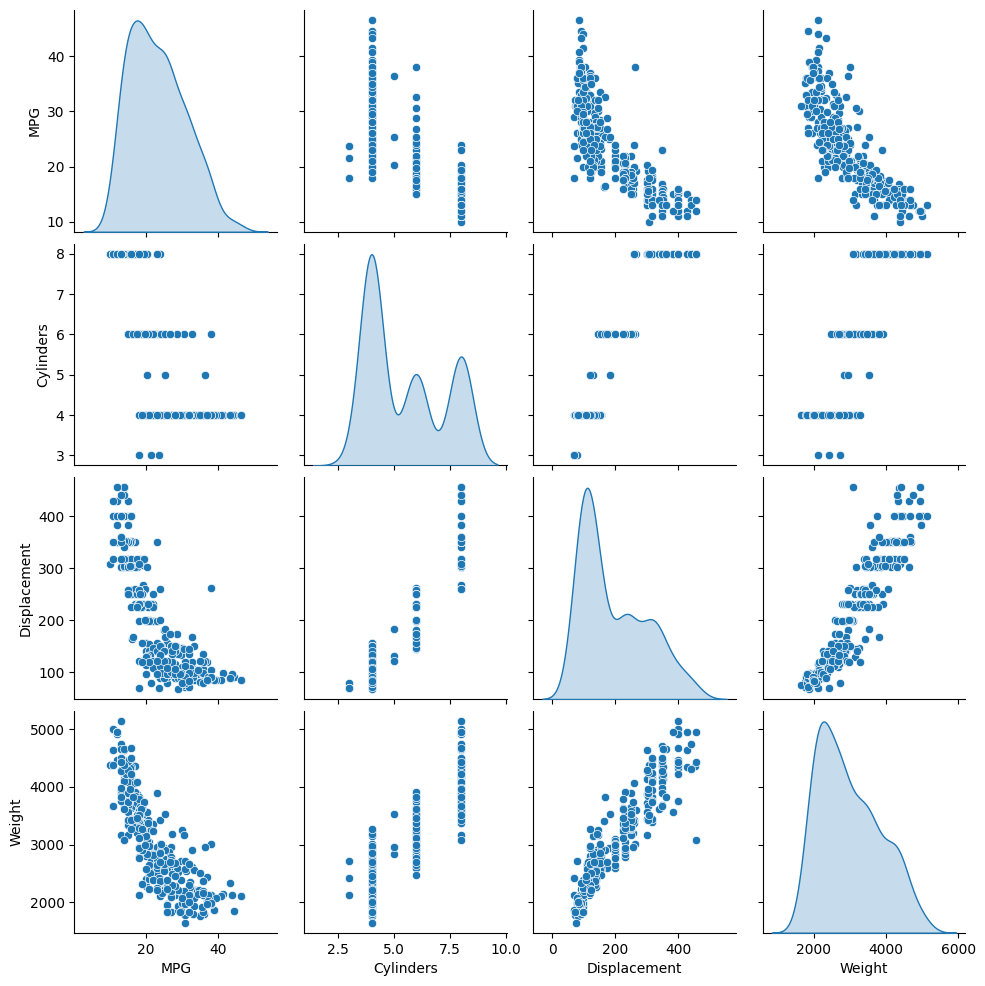

In [11]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [12]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000


In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [14]:
test_labels

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 78, dtype: float64

In [15]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


In [16]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [17]:
normalizer.adapt(np.array(train_features, dtype=np.float32))

In [18]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [19]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first.astype(np.float32)).numpy())

First example: [[4 90.0 75.0 2125.0 14.5 74 False False True]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


Linear regression with one variable

In [20]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1, ], axis=None)
horsepower_normalizer.adapt(horsepower)

Linear Regression With One variable

In [21]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [22]:
horsepower_model.predict(horsepower[:10])


1/1 [==============================] - 0s 87ms/step


array([[ 1.121],
       [ 0.633],
       [-2.069],
       [ 1.572],
       [ 1.422],
       [ 0.558],
       [ 1.684],
       [ 1.422],
       [ 0.37 ],
       [ 0.633]], dtype=float32)

In [23]:
horsepower_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                         loss='mean_absolute_error')

In [24]:
%%time
history = horsepower_model.fit(train_features['Horsepower'],
                               train_labels,
                               epochs=100,
                               verbose=0,
                               validation_split=0.2)

CPU times: user 5.21 s, sys: 192 ms, total: 5.4 s
Wall time: 6.12 s


In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804345,4.193357,95
96,3.802299,4.193828,96
97,3.804307,4.159922,97
98,3.805301,4.171784,98
99,3.803947,4.188023,99


In [26]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


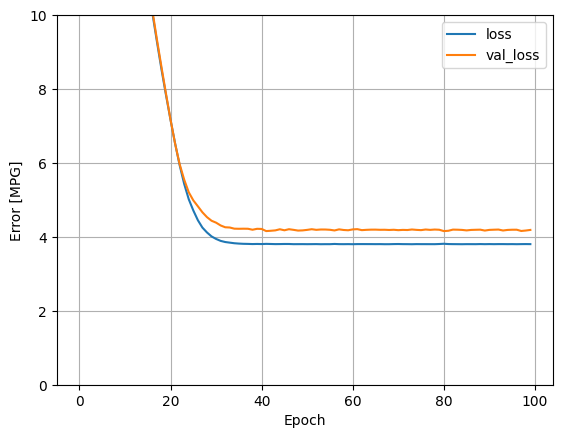

In [27]:
plot_loss(history)

In [28]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [29]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [30]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

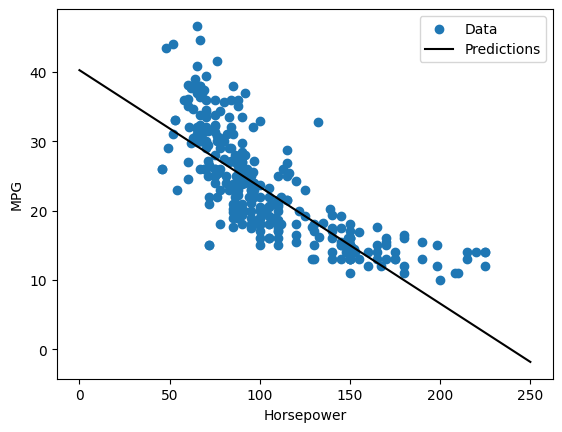

In [31]:
plot_horsepower(x,y)

In [32]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [35]:
train_features[:10]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,False,False,True
282,4,140.0,88.0,2890.0,17.3,79,False,False,True
69,8,350.0,160.0,4456.0,13.5,72,False,False,True
378,4,105.0,63.0,2125.0,14.7,82,False,False,True
331,4,97.0,67.0,2145.0,18.0,80,False,True,False
257,6,232.0,90.0,3210.0,17.2,78,False,False,True
310,4,89.0,60.0,1968.0,18.8,80,False,True,False
328,4,146.0,67.0,3250.0,21.8,80,True,False,False
125,6,198.0,95.0,3102.0,16.5,74,False,False,True
108,4,97.0,88.0,2279.0,19.0,73,False,True,False


In [37]:
linear_model.predict(train_features.astype(float)[:10])

1/1 [==============================] - 0s 347ms/step


array([[-0.737],
       [-0.219],
       [ 0.032],
       [-0.874],
       [ 0.545],
       [ 0.552],
       [ 0.774],
       [ 1.539],
       [ 0.383],
       [ 0.866]], dtype=float32)

In [38]:
linear_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
                     loss='mean_absolute_error')

In [40]:
%%time
history=linear_model.fit(
    train_features.astype(float),
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2)


CPU times: user 4.79 s, sys: 198 ms, total: 4.99 s
Wall time: 5.67 s


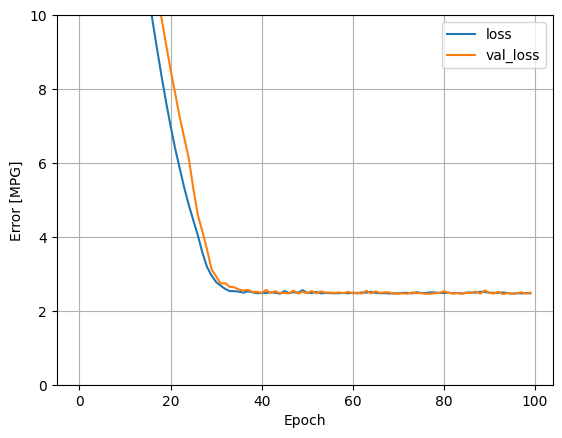

In [42]:
plot_loss(history)

In [45]:
test_results['linear_model'] = linear_model.evaluate(
    test_features.astype(int), test_labels, verbose=0)

In [46]:
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [47]:
dnn_horse_power_model = build_and_compile_model(horsepower_normalizer)

In [48]:
dnn_horse_power_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [49]:
%%time
history = dnn_horse_power_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 5.89 s, sys: 229 ms, total: 6.12 s
Wall time: 11.5 s


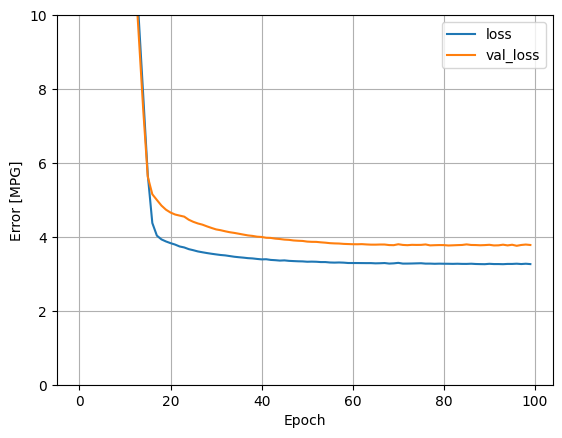

In [50]:
plot_loss(history)

In [51]:
x= tf.linspace(0.0, 250, 251)
y=dnn_horse_power_model.predict(x)

8/8 [==============================] - 0s 3ms/step


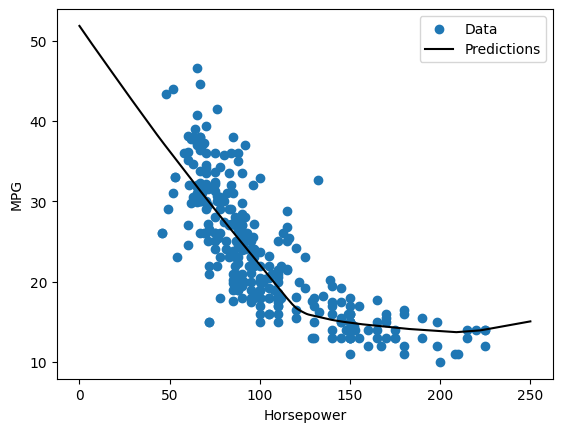

In [53]:
plot_horsepower(x,y)

In [54]:
test_results['dnn_horsepower_model'] = dnn_horse_power_model.evaluate(
    test_features['Horsepower'], test_labels, verbose=0
)